# Crosswalk at Abbey Road

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from skimage.io import imread

import matplotlib.pyplot as plt

# imread: The different colour bands/channels are stored in the third dimension, 
# such that a grey-image is MxN, an RGB-image MxNx3 and an RGBA-image MxNx4.
image = imread('images/beatles-abbey-road-bw.jpg', True)

# George Harrison - Paul McCartney - Ringo Starr - John Lennon
george = imread('images/beatles-abbey-road-bw-1-george.jpg', True)
paul   = imread('images/beatles-abbey-road-bw-2-paul.jpg', True)
ringo  = imread('images/beatles-abbey-road-bw-3-ringo.jpg', True)
john   = imread('images/beatles-abbey-road-bw-4-john.jpg', True)

# Ringo Starr: Pink #CF8DB4 #DB1670; 
# John Lennon: Yellow #E4DAA5 #F5E62D;
# Paul Mc Cartney: Blue #59B3D7 #3BC2E6;
# George Harrison: Orange #DC8375 #E02C1F;

## 1. Template Matching

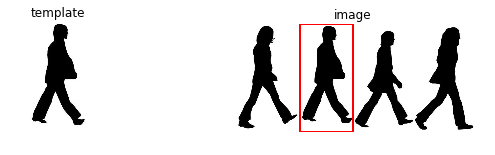

In [3]:
from skimage.feature import match_template

beatle = paul

result = match_template(image, beatle)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(15, 2))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)

ax1.imshow(beatle, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
h, w = beatle.shape
rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none', lw=2)
ax2.add_patch(rect)

plt.show()